# Analyzing Telecom Clients' Behavior 

<h1>Project Description</h1>


As an analyst for the telecom operator Megaline, we will analyze clients' behavior and determine which prepaid plan brings in more revenue.
 The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 
<br>

Description of the plans
<br>Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
- Surf: 
 - Monthly charge: \\$20
 - 500 monthly minutes, 50 texts, and 15 GB of data
 - After exceeding the package limits:
 - 1 minute: 3 cents
 - 1 text message: 3 cents
 - 1 GB of data: \\$10, 
 


- Ultimate
 - Monthly charge: \\$70
 - 3000 monthly minutes, 1000 text messages, and 30 GB of data
 - After exceeding the package limits:
 - 1 minute: 1 cent
 - 1 text message: 1 cent
 - 1 GB of data: \\$7
 
 Description of the data
Remember! Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
- The users table (data on users):
 - user_id — unique user identifier
 - first_name — user's name
 - last_name — user's last name
 - age — user's age (years)
 - reg_date — subscription date (dd, mm, yy)
 - churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
 - city — user's city of residence
 - plan — calling plan name
- The calls table (data on calls):
 - id — unique call identifier
 - call_date — call date
 - duration — call duration (in minutes)
 - user_id — the identifier of the user making the call
- The messages table (data on texts):
 - id — unique text message identifier
 - message_date — text message date
 - user_id — the identifier of the user sending the text
- The internet table (data on web sessions):
 - id — unique session identifier
 - mb_used — the volume of data spent during the session (in megabytes)
 - session_date — web session date
 - user_id — user identifier
- The plans table (data on the plans):
 - plan_name — calling plan name
 - usd_monthly_fee — monthly charge in US dollars
 - minutes_included — monthly minute allowance
 - messages_included — monthly text allowance
 - mb_per_month_included — data volume allowance (in megabytes)
 - usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
 - usd_per_message — price per text after exceeding the package limits
 - usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

<h2> Open the data file and study the general information

In [1]:

from matplotlib import pyplot
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from functools import reduce



In [2]:

megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
megaline_users = pd.read_csv('/datasets/megaline_users.csv')
megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')



#Studying the general information 
print('\n\nCalls')
print(megaline_calls.describe())
print(megaline_calls.head())
print('\n Number of duplicated rows in megaline_calls dataframe:',megaline_calls.duplicated().sum())
print()
megaline_calls.info()

print('\n\nUsers')
print(megaline_users.describe())
print(megaline_users.head())
print('\n Number of duplicated rows in megaline_users dataframe:',megaline_users.duplicated().sum())
print()
megaline_users.info()

print('\n\nMessages')
print(megaline_messages.describe())
print(megaline_messages.head())
print('\n Number of duplicated rows in megaline_messages dataframe:',megaline_messages.duplicated().sum())
print()
megaline_messages.info()

print('\n\nInternet')
print(megaline_internet.describe())
print(megaline_internet.head())
print('\n Number of duplicated rows in megaline_internet dataframe:',megaline_internet.duplicated().sum())
print()
megaline_internet.info()

print('\n\nPlans')
print(megaline_plans.describe())
print(megaline_plans.head())
print('\n Number of duplicated rows in megaline_plans dataframe:',megaline_plans.duplicated().sum())
print()
megaline_plans.info()



#Checking skewness for the dataframes 
print('\n\nCalls')
print(megaline_calls.skew())

print('\n\nUsers')
print(megaline_users.skew())

print('\n\nMessages')
print(megaline_messages.skew())

print('\n\nInternet')
print(megaline_internet.skew())






Calls
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

 Number of duplicated rows in megaline_calls dataframe: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Users
           user_id        

<h4>Conclusion

- All the dates in the files have wrong datatype. <br>
- Did not find any missing values as the count for each column for each data file is same when checked with info() method<br>
- The megaline_calls dataframe is a bit skewed to the right(call_duration = 0.69) apart from that the rest of the dataframes have skewness between -0.5 and 0.5, the data are fairly symmetrical
- We checked for the duplicates using `.duplicated().sum()` method and found that they were none
- There are also no null values in any of the dataframes except for `churn_date` which means the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)


<h2>Prepare the Data

<h3>Convert the data to the necessary types

In [3]:
#Changing the datatype of all the dates of all the dataframes into datetime
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'] , format='%Y.%m.%d')
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'] , format='%Y.%m.%d')
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'] , format='%Y.%m.%d')
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format='%Y.%m.%d')
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format='%Y.%m.%d')



#Checking for the updated datatypes
print('\n\nCalls')
megaline_calls.info()
print('\n\nUsers')
megaline_users.info()
print('\n\nMessages')
megaline_messages.info()
print('\n\nInternet')
megaline_internet.info()



Calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non

<h4>Conclusion

- Changed all the dates datatypes to datetime and checked with `.info()` method
- Did not remove the calls with `duration` and `mb_used` of 0 , as they are a total count of around 26000 and 13000 values, i.e a good 20% and 10% of the values. Assuming that these are customers who are opting for other services. Say 0 duration of calls can be a missed call.

<h3>Find and eliminate errors in the data

In [4]:
#Rounding up individual call duration and replacing them in the the same duration column
print('\n\nCalls duration')
megaline_calls['duration'] = np.ceil(megaline_calls['duration'])
print(megaline_calls.duration.value_counts())


#Setting up respective month column onto each billable dataframes
megaline_messages['month'] = pd.DatetimeIndex(megaline_messages['message_date']).month
megaline_internet['month'] = pd.DatetimeIndex(megaline_internet['session_date']).month
megaline_calls['month'] = pd.DatetimeIndex(megaline_calls['call_date']).month



#Grouping data for each user and month for call duration, internet and messages respectively
grouped_calls = megaline_calls.groupby(['user_id','month'])['duration'].agg({'count','sum'})
grouped_internet = megaline_internet.groupby(['user_id','month'])['mb_used'].agg({'sum'})
grouped_messages = megaline_messages.groupby(['user_id','month'])['message_date'].agg({'count'})



#Merging the above three dataframes
data_frames = [ grouped_calls,grouped_internet, grouped_messages]
first_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],how='outer'), data_frames)
first_merged.rename(columns = {'sum_x':'total_duration', 'count_x':'count_calls','sum_y':'total_data', 'count_y':'count_messages'}, inplace = True)



#Rounding of the total internet used

first_merged['total_data'] = np.ceil(first_merged['total_data']/1024)
first_merged = first_merged.reset_index()



#Merging with users dataframe
data_frames2 = [megaline_users,first_merged]
final_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'], how ='outer'), data_frames2).fillna(0)


#Checking for rows with 0 as month
print('Zero month rows')
print(final_merged.query('month == 0'))
print('Zero total_duration, total_data and count_messages rows')
#Checking for rows with total_duration == 0 and total_mb == 0 and count_messages == 0
print(final_merged.query('total_duration == 0 and total_data == 0 and count_messages == 0'))

#Dropping rows with 0 as month
final_merged.drop(final_merged[final_merged['month'] == 0].index, inplace = True) 
final_merged = final_merged.reset_index()




Calls duration
0.0     26834
6.0      7848
5.0      7778
7.0      7769
8.0      7718
4.0      7434
9.0      7357
3.0      6942
10.0     6918
2.0      6446
11.0     6407
1.0      5795
12.0     5750
13.0     5070
14.0     4402
15.0     3889
16.0     3011
17.0     2461
18.0     1992
19.0     1604
20.0     1243
21.0      910
22.0      671
23.0      461
24.0      324
25.0      235
26.0      157
27.0      118
28.0       62
29.0       58
30.0       27
31.0       18
32.0       13
33.0        6
36.0        3
34.0        2
38.0        1
37.0        1
Name: duration, dtype: int64
Zero month rows
      user_id  first_name  last_name  age  \
86       1025        Jess  Wilkinson   64   
612      1129       Marin     Bolton   70   
682      1143      Lorina    Stevens   69   
1285     1269      Irving   Thompson   39   
1297     1275       Elvie  Velazquez   33   
1418     1307  Kristopher       Lang   28   
1466     1319      Eliseo     Carson   21   
1762     1378    Mckinley    Clayton   22   
2

<h4>Conclusion

- Rounded up individual call duration and replacing them in the the same duration column while the individual web sessions are not rounded up. Instead, the total for the month is rounded up.
- When merging filled the NaN values with 0
- The merged dataframes has now in total of 2303 rows for 500 customers. 
- We also notice that there are outliers present in the data, for example - `total_duration` has a max value of 1432 where the mean and median is around 400. Similarily for `total_data` and `count_messages`. We also notice that there is a min value of 0 in `month` column. That might have been due to filling the NaN values with 0. 
- Since the rows with 0 `month` and the rows with `total_duration`,`total_data` and `count_messages` as 0 are same.  
- When compared the 0 `month` users `reg_date` with `churn_date` , 3 of them have just registered themselves are still paying customers, they are the users who have just bought the plans and did not get to use it for more than a month and will end up paying the basic monthly charge. There are 2 who just cancelled their plan in December. Since most of them only started their contracts in the last quarter of the year so their absence won't affect the data that much.The whole idea is about monthly spending on messages,internet, calls.
- Therefore will be dropping those values.

<h3>The number of calls made and minutes used per month

In [8]:
print('Sample of the number of calls made and minutes used view for each user:')
print(final_merged[['user_id','count_calls','total_duration']].sample(5))

Sample of the number of calls made and minutes used:
      user_id  count_calls  total_duration
1433     1312         55.0           384.0
1902     1406         61.0           425.0
1811     1390         97.0           726.0
2245     1491         48.0           429.0
932      1194          0.0             0.0


<h4>Conclusion

Here we can see the total number of calls and the total duration of those calls for each user.

<h3>The number of text messages sent per month

In [16]:
print('Sample of the number of text messages sent per month view for each user:')
print(final_merged.groupby(['user_id','month'])['count_messages'].agg({'count'}).head(6))

Sample of the number of text messages sent per month view for each user:
               count
user_id month       
1000    12.0       1
1001    8.0        1
        9.0        1
        10.0       1
        11.0       1
        12.0       1


<h4>Conclusion

Here we have the count of messages for each month sent by a user

<h3>The volume of data per month

In [17]:
print('Volume of the data per month view for each user:')
print(final_merged.groupby(['user_id','month'])['total_data'].agg({'sum'}).head(6))

Volume of the data per month view for each user:
                sum
user_id month      
1000    12.0    2.0
1001    8.0     7.0
        9.0    14.0
        10.0   22.0
        11.0   19.0
        12.0   19.0


<h4>Conclusion

Here we have the total volume of data per month used by a user

<h2>Prepare the Data - Revenue Generator

<h3>The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [19]:
#Finding the monthly revenue from each user
#Surf plan charges
S_MONTH_CHARGE = 20
S_MONTH_MINUTES = 500
S_MONTH_TEXTS = 50
S_MONTH_DATA = 15

S_EXCESS_MINUTES = 0.03
S_EXCESS_TEXTS = 0.03
S_EXCESS_DATA = 10

#Ultimate plan charges
U_MONTH_CHARGE = 70
U_MONTH_MINUTES = 3000
U_MONTH_TEXTS = 1000
U_MONTH_DATA = 30

U_EXCESS_MINUTES = 0.01
U_EXCESS_TEXTS = 0.01
U_EXCESS_DATA = 7


def total_revenue(row):
    plan = row['plan']
    messages = row['count_messages']
    monthly_minutes = row['total_duration']
    internet_usage = row['total_data']
    if plan == 'surf':
 
        if monthly_minutes >= S_MONTH_MINUTES:
            revenue_calls = (S_EXCESS_MINUTES)*(monthly_minutes - S_MONTH_MINUTES) 
        else:
            revenue_calls = 0
        if messages >= S_MONTH_TEXTS:
            revenue_messages = S_EXCESS_TEXTS*(messages - S_MONTH_TEXTS)
        else :
            revenue_messages = 0
        if internet_usage >= S_MONTH_DATA:
            revenue_internet_usage = S_EXCESS_DATA*(internet_usage - S_MONTH_DATA)
        else :
            revenue_internet_usage = 0
 
        cost = S_MONTH_CHARGE + revenue_messages + revenue_internet_usage + revenue_calls
 
 
 
    elif plan == 'ultimate':
 
        if monthly_minutes >= U_MONTH_MINUTES:
            revenue_calls = (U_EXCESS_MINUTES)*(monthly_minutes - U_MONTH_MINUTES) 
        else:
            revenue_calls = 0
        if messages >= U_MONTH_TEXTS:
            revenue_messages = U_EXCESS_TEXTS*(messages - U_MONTH_TEXTS)
        else :
            revenue_messages = 0
        if internet_usage >= U_MONTH_DATA:
            revenue_internet_usage = U_EXCESS_DATA*(internet_usage - U_MONTH_DATA)
        else :
            revenue_internet_usage = 0
 
        cost = U_MONTH_CHARGE + revenue_messages + revenue_internet_usage + revenue_calls
 
    return cost


#Adding cost column to the final merged dataframe
final_merged['total_cost'] = final_merged.apply(total_revenue, axis = 1)

final_merged.sample(5)


,index,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_duration,count_calls,total_data,count_messages,total_cost
88,89,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,0,7.0,347.0,46.0,12.0,18.0,20.00
1311,1316,1280,Jasper,Berry,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,0,6.0,65.0,11.0,5.0,11.0,20.00
1454,1460,1317,Ruthanne,Heath,70,"Phoenix-Mesa-Chandler, AZ MSA",2018-11-11,ultimate,0,11.0,418.0,58.0,9.0,0.0,70.00
894,897,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31 00:00:00,12.0,91.0,17.0,2.0,13.0,70.00
1450,1456,1316,Lucilla,Weeks,59,"Tulsa, OK MSA",2018-05-21,surf,0,9.0,180.0,32.0,24.0,61.0,110.33


<h4>Conclusion

- Rounded seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up even the one second call is counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up based on 1024mb = 1GB
- Calculated monthly charges for Surf customers based on the given plan of:
`Monthly charge: $20
 500 monthly minutes, 50 texts, and 15 GB of data
    After exceeding the package limits:
1 minute:3 cents;1 text message:3 cents;1 GB of data:$10
`
<br>
- Calculated monthly charges for Ultimate customers based on the given plan of:
`Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute:1 cent; 1 text message:1 cent; 1 GB of data:$7
`


<h2>Analyze the Data

Here we are working on the data to get an understanding of customers' behaviour. With the help of histograms we can get a better understanding of both the plans and how it works for the customers. We will also find the minutes, texts, and volume of data the users of each plan require per month as well as the mean, dispersion, and standard deviation

<h3>Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. 

Skewness
index             0.021651
user_id           0.071628
age               0.020578
month            -0.790531
total_duration    0.120221
count_calls       0.054274
total_data       -0.068821
count_messages    0.984244
total_cost        1.265476
dtype: float64


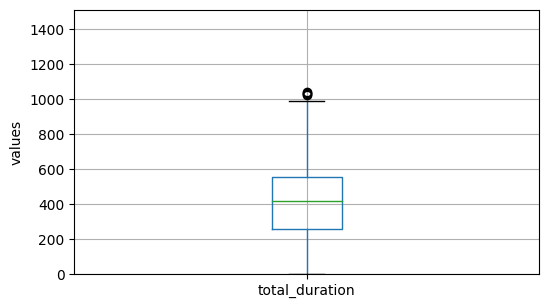

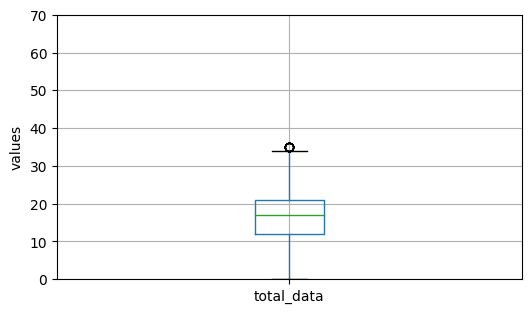

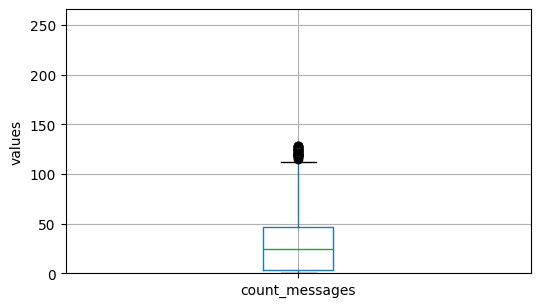

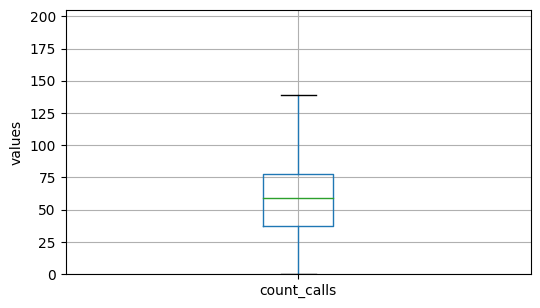

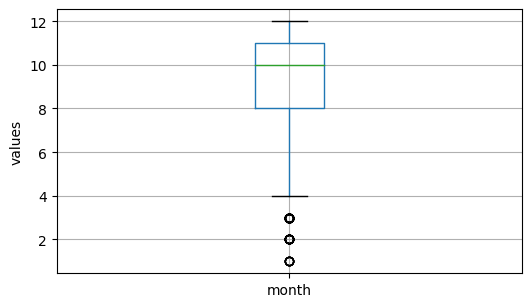

Skewness
index             0.021651
user_id           0.071628
age               0.020578
month            -0.790531
total_duration    0.120221
count_calls       0.054274
total_data       -0.068821
count_messages    0.984244
total_cost        1.265476
dtype: float64


The mean, dispersion, and standard deviation:


,index,user_id,age,month,total_duration,count_calls,total_data,count_messages,total_cost
count,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000
mean,1146.059314,1245.092215,45.540315,9.134384,411.010195,57.534291,16.269694,29.717331,60.110533
std,664.677137,143.002525,16.790288,2.510158,210.723794,28.818368,6.863428,29.045610,36.875547
min,0.000000,1000.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,566.250000,1120.000000,30.000000,8.000000,260.000000,37.000000,12.000000,3.000000,22.160000
50%,1137.500000,1241.000000,46.000000,10.000000,416.000000,59.000000,17.000000,24.000000,70.000000
75%,1723.750000,1368.000000,61.000000,11.000000,554.000000,78.000000,21.000000,47.000000,70.000000
max,2302.000000,1499.000000,75.000000,12.000000,1043.000000,139.000000,35.000000,128.000000,227.230000


In [28]:
#Checking for the skewness
print('Skewness')
print(final_merged.skew())


#Finding outliers of the final merged dataframe using boxplot for the quantitative columns

pyplot.ylim(0,1510)
final_merged.boxplot(column=["total_duration"]) 
pyplot.ylabel('values')
pyplot.show()
pyplot.ylim(0,70)
final_merged.boxplot(column=["total_data"]) 
pyplot.ylabel('values')
pyplot.show()
pyplot.ylim(0,266)
final_merged.boxplot(column=["count_messages"])
pyplot.ylabel('values')
pyplot.show()
pyplot.ylim(0,205)
final_merged.boxplot(column=["count_calls"]) 
pyplot.ylabel('values')
pyplot.show()


#Final dataframe after removing the outlier data
final_merged = final_merged.query('total_duration < 1050 and count_messages <130 and total_data <36 and count_calls <140')


#Checking for the skewness
print('Skewness')
print(final_merged.skew())

print('\n\nThe mean, dispersion, and standard deviation:')
final_merged.describe()





<h4>Conclusion

- We can see that `total_duration`,`total_data` ,the data are moderately skewed
- `total_cost` and `count_messages`, the data are highly skewed
- Rest of the column have skewness in between -0.5 and 0.5, the data are fairly symmetrical
- We see that `month` and `age` also has skewness but it is a fixed data like `user_id`, hence we wont operate on these columns to change the skewness, i.e to remove outliers<br>



- Removed the outliers using the boxplot method. Did not work on the `total_cost` column as it is a dependent column. Therefore worked on `total_data`,`total_duration`, `count_calls` and `count_messages`.
- First boxplotted all the `total_data`,`total_duration`, `count_calls` and `count_messages` columns based on their ranges which I got from the `.describe()` method.
- Updated the `final_merged` dataframe by filtering the values based on the outliers seen on the boxplot graphs.
- There are now 2132 data entries to work on as compared to the previous 2293 entries.


<h3>Plot histograms. Describe the distributions.

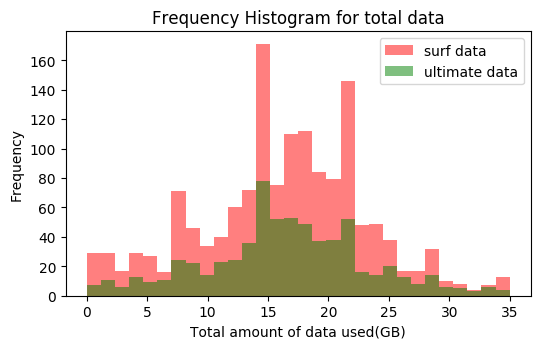

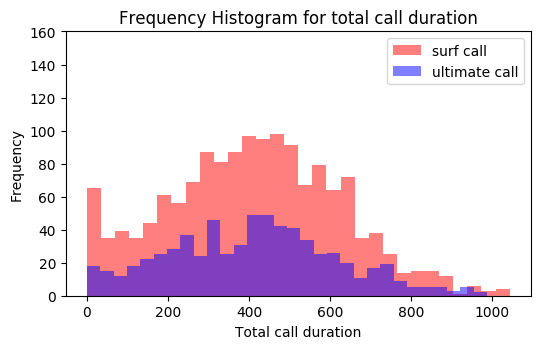

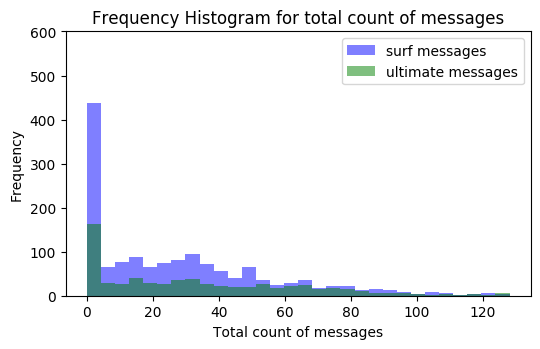

Final merged data description:

             index      user_id          age        month  total_duration  \
count  2158.000000  2158.000000  2158.000000  2158.000000     2158.000000   
mean   1146.059314  1245.092215    45.540315     9.134384      411.010195   
std     664.677137   143.002525    16.790288     2.510158      210.723794   
min       0.000000  1000.000000    18.000000     1.000000        0.000000   
25%     566.250000  1120.000000    30.000000     8.000000      260.000000   
50%    1137.500000  1241.000000    46.000000    10.000000      416.000000   
75%    1723.750000  1368.000000    61.000000    11.000000      554.000000   
max    2302.000000  1499.000000    75.000000    12.000000     1043.000000   

       count_calls   total_data  count_messages   total_cost  
count  2158.000000  2158.000000     2158.000000  2158.000000  
mean     57.534291    16.269694       29.717331    60.110533  
std      28.818368     6.863428       29.045610    36.875547  
min       0.000000    

In [24]:

#Plotting histogram for total data for both surf and ultimate plans
surf_data = final_merged.loc[final_merged.plan=='surf','total_data']
ultimate_data = final_merged.loc[final_merged.plan=='ultimate','total_data']

pyplot.rcParams.update({'figure.figsize':(6,3.5), 'figure.dpi':100})
pyplot.hist(surf_data, alpha=0.5, bins = 30, color = 'r', label='surf data')
pyplot.hist(ultimate_data, alpha=0.5, bins = 30, color = 'g', label='ultimate data')
pyplot.legend(loc='upper right')
pyplot.gca().set(title='Frequency Histogram for total data', ylabel='Frequency')
pyplot.xlabel('Total amount of data used(GB)')
pyplot.show()


#Plotting histogram for total call duration for both surf and ultimate plans
surf_call = final_merged.loc[final_merged.plan=='surf','total_duration']
ultimate_call = final_merged.loc[final_merged.plan=='ultimate','total_duration']

pyplot.rcParams.update({'figure.figsize':(6,3.5), 'figure.dpi':100})
pyplot.hist(surf_call, alpha=0.5, bins = 30, color = 'r', label='surf call')
pyplot.hist(ultimate_call, alpha=0.5, bins = 30, color = 'b', label='ultimate call')
pyplot.legend(loc='upper right')
pyplot.gca().set(title='Frequency Histogram for total call duration', ylabel='Frequency')
pyplot.ylim(0,160)
pyplot.xlabel('Total call duration')
pyplot.show()


#Plotting histogram for total count of messages for both surf and ultimate plans
surf_msg = final_merged.loc[final_merged.plan=='surf','count_messages']
ultimate_msg = final_merged.loc[final_merged.plan=='ultimate','count_messages']

pyplot.rcParams.update({'figure.figsize':(6,3.5), 'figure.dpi':100})
pyplot.hist(surf_msg, alpha=0.5, bins = 30, color = 'b', label='surf messages')
pyplot.hist(ultimate_msg, alpha=0.5, bins = 30, color = 'g', label='ultimate messages')
pyplot.legend(loc='upper right')
pyplot.gca().set(title='Frequency Histogram for total count of messages', ylabel='Frequency')
pyplot.ylim(0,600)
pyplot.xlabel('Total count of messages')
pyplot.show()



#Dispersion of the data
print('Final merged data description:\n')
print(final_merged.describe())


<h4>Conclusion

- From the above histograms we can make the following conclusions for
- Total Data used
    - Both for Surf and Ultimate plans mostly people use an average of 17-18GB data, the number of users using the data are different. There are almost 3 times more Surf users as compared to Ultimate plan users.
- Total Call Duration
     - Both for Surf and Ultimate plans most people spend a little less 500 minutes speaking on the phone for a month, although the number of users using are different. There are almost 2 times more Surf users as compared to Ultimate plan users.
- Total Messages sent
    - We can notice that mostly people do not send a text message as there are huge peaks at 0 messages. Here as well we see that the number of users sending the same number of text messages are more than double in Surf plan as compared to Ultimate plan users
- The other very noticeable thing  as per the histograms is that the ranges are almost similar for both surf and ultimate users,for the all the three areas - data, calls, messages.
- Also we can see from the `.describe()` method, the way the data has been distributed.
- Now after removing the outliers we can now see that the mean and median are very close in range.

<h2>Test the hypotheses - For Surf and Ultimate plan users


We start with the null hypothesis H₀ : “The average revenue from users of Ultimate plans is equal to Surf calling plans.” The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, “The average revenue from users of Ultimate plans is not equal to Surf calling plans.”

In [31]:

#Creating two dataframes for surf plan and ultimate plan users
surf_df = final_merged.query("plan == 'surf'")
ultimate_df = final_merged.query("plan == 'ultimate'")

#Hypothesis on the Equality of Two Population Means
#Finding the variance
print('\n\n Surf Variance: ',np.var(surf_df.total_cost))
print('Ultimate Variance: ',np.var(ultimate_df.total_cost))
print('Ratio:',np.var(surf_df.total_cost)/np.var(ultimate_df.total_cost))

results = stats.ttest_ind(
        surf_df.total_cost, 
        ultimate_df.total_cost, equal_var = False)
#

print("\n\n  Welch's t-test 's " ) 
alpha = 0.05
if results.pvalue > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    
print('p-value:',results.pvalue)





 Surf Variance:  1893.1822340498625
Ultimate Variance:  11.63023055685037
Ratio: 162.781143915909


  Welch's t-test 's 
Different distribution (reject H0)
p-value: 4.680405731838834e-38


<h4>Conclusion

-  Welch's t-test  - as we have more than 50 entities for each case and after removing the outliers the data somewhat resembles that of normally distributed data as well:
- We checked for the variance of both surf and ultimate total_cost data, and we found that ratio of the larger sample variance to the smaller sample variance is greater than 4:1. This means we can assume that the population variances are not equal.
- Thus, we proceeded to perform the two sample t-test with unequal variances with alpha being 0.05
- We can now make the assumption that - The average revenue from users of Ultimate and Surf calling plans differs.

<h2>Test the hypotheses - For NY-NJ and other users


We start with the null hypothesis H₀ : “The average revenue from users of NY-NJ city  is equal to people living in other cities.” The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, “The average revenue from users of NY-NJ city  is not equal to people living in other cities.”


In [32]:
#Creating a dataframe for users in NY-NJ area
ny_njdf = final_merged[final_merged['city'].str.contains("NY-NJ")] 


#Creating a dataframe for users in other areas
other_df = final_merged[~final_merged['city'].str.contains("NY-NJ")] 


#NY-NJ and Other cities total cost
print('\n\nNY-NJ Users total Revenue: ',ny_njdf.total_cost.sum())
print('Other cities Users total Revenue: ',other_df.total_cost.sum())


#Hypothesis on the Equality of Two Population Means
#Variance of NY-NJ and Other cities total cost
print('NY-NJ Variance of total cost: ',np.var(ny_njdf.total_cost))
print('Other cities Variance of total cost: ',np.var(other_df.total_cost))
print('Ratio:',np.var(other_df.total_cost)/np.var(ny_njdf.total_cost))

results = stats.ttest_ind(
        ny_njdf.total_cost, 
        other_df.total_cost, equal_var = True)
#
print("\n\nStudent's t-test" ) 
alpha = 0.05
if results.pvalue > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    
print('p-value:',results.pvalue)




NY-NJ Users total Revenue:  21153.989999999998
Other cities Users total Revenue:  108564.54000000001
NY-NJ Variance of total cost:  1591.610229610436
Other cities Variance of total cost:  1310.0402661616288
Ratio: 0.8230911323573709


Student's t-test
Same distribution (fail to reject H0)
p-value: 0.15898070313969376


<h4>Conclusion

- Student's t-test - as we have more than 50 entities for each case and after removing the outliers the data somewhat resembles that of normally distributed data as well:
- We checked for the variance of both NY-NJ and Other users total_cost data, and we found that ratio of the larger sample variance to the smaller sample variance is lesser than 4:1. This means we can assume that the population variances are equal.
- Thus, we proceeded to perform the two sample t-test with equal variances with alpha being 0.05
- As the hypothesis is not rejected so we can assume that - The average revenue from users of NY-NJ city does not differs to the average revenue from people living in other cities.
- The p-value tells us that although the average amounts for the two groups of data are different, there is a 16% probability of randomly getting a difference that size or larger. This probability is clearly too high to conclude that there is a significant difference between the average revenue.

# Overall Conclusion

- Even though Ultimate plan offers 3000 monthly minutes, 1000 text messages, and 30 GB of data , rarely do customers use up this much amount of call minutes, messages and internet. 
- From the above analysis we can conclude that Surf plan users brings in more revenue that Ultimate plan users. This might be due to Surf plan the amount of amount of call minutes, messages and internet offered in its plan is exactly around the average amount of call minutes, messages and internet used by a customer and that too for a monthly charge of less than 1/3 of Ultimate monthly plan. Therefore more number of customers end up buying this plan. thus more revenue is generated.
- There is a 16% probability that the average revenue from users of NY-NJ city can differ to that of people living in other cities. This might be due to the fact that is just one area/city as compared to the rest of the country/72 cities

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1:</b> Swarna, you've done a really good job and your conclusion is correct! You could also add the conclusion regarded the hypotheses that the average profit from users in NY-NJ area is different from that of the users from other regions. 
</div>

<div class="alert alert-info">
    Thank you for the feedback, I really appreciate it. When re-working on my prject based on the feedback, it beacame much more clearer on why the things are supposed to be in that way. I have tried implementing the given suggestions and corrections on my project to the best of my knowledge. Please take a look and let me know if I am still missing something. Thank you!</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2:</b> Swarna, thank you for your work and for improving the project. You've done a really good job! Keep up the good work and good luck on the next sprint!
</div>